# Práctica de web scraping
En esta práctica vamos a realizar distintos ejercicios sobre captura de contenidos web (web scraping) usando las librerías `request` y `BeautifulSoup`.

In [1]:
import requests
from bs4 import BeautifulSoup

## Parte 1: captura de una noticia
En este parte vamos a descargarnos una noticia de una página web y guardar su contenido en memoria.

In [2]:
url = "https://elpais.com/sociedad/2019/11/13/actualidad/1573632952_315974.html"
try:
    page = requests.get(url)
except:
    print("Error al abrir la URL")

In [10]:
# parseamos el html usando BeautifulSoup y lo guardamos en la variable `soup`
soup = BeautifulSoup(page.text, 'html.parser')


bs4.BeautifulSoup

El contenido del artículo (texto del cuerpo) se encuentra dentro de un `<div>` de la página con la clase `a_c clearfix` (puedes inspeccionar la estructura HTML de la página en el navegador para comprobarlo)

In [12]:
# Buscamos el <div> correspondiente y sacamos su contenido:
content = soup.find('div', {"class": "a_c clearfix"})

article = []
for i in content.find_all('p'):
    article.append(i.text)
    
print('\n'.join(article))

Los venecianos viven en esta época del año refrescando cada minuto la aplicación del Centro de Previsión de Mareas, que permite saber hasta qué nivel puede llegar el acqua alta. El martes había luna llena y muchos se temieron lo peor, pero se fueron a cenar con el último dato de 140 centímetros. Pasadas las diez empezaron a sonar las sirenas. Un viento de más de 120 kilómetros por hora formó un pequeño maremoto en la laguna que provocó una subida de hasta 187 centímetros, la mayor desde la histórica catástrofe de 1966. Muchas de las 71 góndolas de la Riva Degli Schiavoni rompieron las amarras y salieron flotando hasta dar contra las columnas del Palacio Ducal. Algunos barrios se quedaron a oscuras y el agua entró violentamente en la basílica de San Marcos. Luego comenzó una subida por toda la isla que causó dos muertos, anegó restaurantes, palacios y comercios y obligó a cerrar escuelas. La ciudad está en alerta hasta el viernes por riesgo de que este episodio se repita.
La ciudad empi

Aquí se han colado algunos párrafos que no pertenecen al cuerpo de la noticia, sino que están en secciones interiores. Lo podemos evitar usando el parámetro `recursive=False`.  
Además el último párrafo no forma parte del cuerpo de la memoria, lo podemos filtrar con `class_=""` porque tiene un atributo de clase específico

In [13]:
#optimizando el código
content = soup.find('div', {"class": "a_c clearfix"}).find_all('p', class_="",recursive=False)

article = ('\n').join([i.text for i in content])

print(article)

Los venecianos viven en esta época del año refrescando cada minuto la aplicación del Centro de Previsión de Mareas, que permite saber hasta qué nivel puede llegar el acqua alta. El martes había luna llena y muchos se temieron lo peor, pero se fueron a cenar con el último dato de 140 centímetros. Pasadas las diez empezaron a sonar las sirenas. Un viento de más de 120 kilómetros por hora formó un pequeño maremoto en la laguna que provocó una subida de hasta 187 centímetros, la mayor desde la histórica catástrofe de 1966. Muchas de las 71 góndolas de la Riva Degli Schiavoni rompieron las amarras y salieron flotando hasta dar contra las columnas del Palacio Ducal. Algunos barrios se quedaron a oscuras y el agua entró violentamente en la basílica de San Marcos. Luego comenzó una subida por toda la isla que causó dos muertos, anegó restaurantes, palacios y comercios y obligó a cerrar escuelas. La ciudad está en alerta hasta el viernes por riesgo de que este episodio se repita.
La ciudad empi

Si quisiéramos hacer un filtrado más específico de párrafos o contenidos, podemos definir una función lógica que devuelva a `find_all` los elementos a considerar:
```python
def has_class_but_no_id(tag):
    return tag.has_attr('class') and not tag.has_attr('id')
```

Que luego usamos con:

```python
content.find_all(has_class_but_no_id)
```


In [14]:
#Por ejemplo los párrafos que contienen la palabra basílica
def contiene_basilica(tag):
    return tag.name=='p' and 'basílica' in tag.text

content = soup.find('div', {"class": "a_c clearfix"})
content.find_all(contiene_basilica)

[<p class="">Los venecianos viven en esta época del año refrescando cada minuto la aplicación del Centro de Previsión de Mareas, que permite saber hasta qué nivel puede llegar el <em>acqua alta</em>. El martes había luna llena y muchos se temieron lo peor, pero se fueron a cenar con el último dato de 140 centímetros. Pasadas las diez empezaron a sonar las sirenas. Un viento de más de 120 kilómetros por hora formó un pequeño maremoto en la laguna que provocó una subida de hasta 187 centímetros, la mayor desde la histórica catástrofe de 1966. Muchas de las 71 góndolas de la Riva Degli Schiavoni rompieron las amarras y salieron flotando hasta dar contra las columnas del Palacio Ducal. Algunos barrios se quedaron a oscuras y el agua entró violentamente en la basílica de San Marcos. Luego comenzó una subida por toda la isla que causó dos muertos, anegó restaurantes, palacios y comercios y obligó a cerrar escuelas. La ciudad está en alerta hasta el viernes por riesgo de que este episodio se 

### Ejercicio 1
Busca los párrafos dentro de la etiqueta `<div>` con el cuerpo de la noticia que contengan un elemento de tipo enlace (`<a>`)

In [17]:
## Solución

content = soup.find('div', {"class": "a_c clearfix"})

article = []
for i in content.find_all('p'):
    if i.find('a'): # se verifica si hay un elemento "a" dentro del párrafo
        article.append(i.text)
    
print('\n'.join(article))


La ciudad empieza a estar harta de algo que todo el mundo cree que se podría evitar. Los efectos del cambio climático, que han aumentado la frecuencia y la intensidad de las tradicionales mareas de otoño (el año pasado sucedió algo parecido), un fuerte temporal y la negligencia en la construcción de un sistema de diques que dura ya 40 años dejaron la segunda peor inundación del siglo. Los daños en el patrimonio artístico de la ciudad de 1966 no se repitieron: los venecianos toman ya grandes precauciones en estas épocas. Pero este miércoles por la mañana, en medio de un paisaje apocalíptico con vaporetos y lanchas sobre la acera, podían verse todavía los efectos en la vida de la gente. El primer ministro, Giuseppe Conte, ha llegado a la ciudad por la tarde y ha asegurado que tomará medidas. “Hay una petición del gobernador Zaia para declarar el estado de emergencia y no veo razones para negarlo. Prepararemos los primeros fondos para la participación del Gobierno en esta emergencia”, ha 

## Parte 2: captura de datos meteorológicos
En este parte vamos a capturar datos meteorológicos de la Comunitat Valenciana desde la página de la [AVAMET (Associació valenciana de meteorologia)](https://www.avamet.org).

In [53]:
#esta página contiene los datos meteorológicos de un día concreto
fecha = '2021-02-10'
r = requests.get("https://www.avamet.org/mx-meteoxarxa.php", params={'id':fecha})

In [54]:
soup = BeautifulSoup(r.text, "html.parser")

Los datos de todos los municipios de la CV están en una tabla de clase `tDades`

In [56]:
tabla = soup.find("table", class_="tDades")

Dentro de la tabla, los datos están en las filas (`<tr>`) que tienen un elemento`<td class='rEsta'>`. Definimos una función para filtrar etiquetas con esta clase y buscamos todos los elementos internos a la tabla:

In [57]:
def clase_rEsta(tag):
    return tag.find(class_="rEsta")

In [58]:
loc = tabla.find_all(clase_rEsta)


In [43]:
len(loc)

653

Nos fijamos por ejemplo en el primer elemento de esta lista:

In [59]:
print(loc[0].prettify())

<tr>
 <td class="rEsta">
  <a class="negre" href="mx-fitxa.php?id=c01m038e20">
   <img alt="" height="13" src="imatges/2017/clas/estrela-mx-.png" title="" width="13">
    Castellfort
    <span class="rEstaDmxo">
     <span class="ptda">
     </span>
     AEMET
    </span>
   </img>
  </a>
 </td>
 <td class="rValm colornT16">
  2,4
 </td>
 <td class="rValm colornT17">
  4,7
 </td>
 <td class="rValm colornT18">
  7,0
 </td>
 <td class="rVal">
 </td>
 <td class="rValm colorP">
  0,0
 </td>
 <td class="rVal">
 </td>
 <td class="rVal">
 </td>
 <td class="rVal">
  <b>
  </b>
 </td>
</tr>



Vemos que algunas de las celdas de esta fila tienen elementos de tipo `<span>`. Si no nos interesan los podríamos eliminar con el método `.decompose()` del Tag. Pero como el texto nos interesa insertamos un espacio para separar el contenido al extraer el texto posteriormente con `.text()`:

In [60]:
for t in loc:
    for t in t.find_all('span', class_="rEstaDmxo"):
        t.insert_before(' ')
print(loc[0].prettify())

<tr>
 <td class="rEsta">
  <a class="negre" href="mx-fitxa.php?id=c01m038e20">
   <img alt="" height="13" src="imatges/2017/clas/estrela-mx-.png" title="" width="13">
    Castellfort
    <span class="rEstaDmxo">
     <span class="ptda">
     </span>
     AEMET
    </span>
   </img>
  </a>
 </td>
 <td class="rValm colornT16">
  2,4
 </td>
 <td class="rValm colornT17">
  4,7
 </td>
 <td class="rValm colornT18">
  7,0
 </td>
 <td class="rVal">
 </td>
 <td class="rValm colorP">
  0,0
 </td>
 <td class="rVal">
 </td>
 <td class="rVal">
 </td>
 <td class="rVal">
  <b>
  </b>
 </td>
</tr>



In [65]:
#Cada celda <td> dentro de la fila es una columna de la tabla
[t.text.strip() for t in loc[0].find_all("td")]

['Castellfort AEMET', '2,4', '4,7', '7,0', '', '0,0', '', '', '']

In [66]:
[t for t in loc[0].find_all("td")]

[<td class="rEsta"><a class="negre" href="mx-fitxa.php?id=c01m038e20"><img alt="" height="13" src="imatges/2017/clas/estrela-mx-.png" title="" width="13"> Castellfort <span class="rEstaDmxo"><span class="ptda"></span>AEMET</span></img></a> </td>,
 <td class="rValm colornT16">2,4 </td>,
 <td class="rValm colornT17">4,7 </td>,
 <td class="rValm colornT18">7,0 </td>,
 <td class="rVal"> </td>,
 <td class="rValm colorP">0,0 </td>,
 <td class="rVal"> </td>,
 <td class="rVal"> </td>,
 <td class="rVal"><b> </b></td>]

In [70]:
#Capturamos toda la tabla
datos = [[t.text.strip() for t in l.find_all("td")] for l in loc]


In [68]:
#Todas las filas tienen los mismos datos
[len(d) for d in datos]

[9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,


Ahora exportamos la tabla como un DataFrame de `pandas`:

In [71]:
import pandas as pd

In [72]:
data_matrix = pd.DataFrame(datos, columns = ['localidad','Temp','Tmax','Tmin','Humedad','Precip',
                      'Vel.viento','Dir.viento','Vmax_viento']) #Definimos el nombre de las columnas

In [73]:
data_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   localidad    653 non-null    object
 1   Temp         653 non-null    object
 2   Tmax         653 non-null    object
 3   Tmin         653 non-null    object
 4   Humedad      653 non-null    object
 5   Precip       653 non-null    object
 6   Vel.viento   653 non-null    object
 7   Dir.viento   653 non-null    object
 8   Vmax_viento  653 non-null    object
dtypes: object(9)
memory usage: 46.0+ KB


In [74]:
data_matrix.head(5)

,localidad,Temp,Tmax,Tmin,Humedad,Precip,Vel.viento,Dir.viento,Vmax_viento
0,Castellfort AEMET,"2,4","4,7","7,0",,"0,0",,,
1,Cinctorres,"4,4","7,4","9,9",61,"0,6","16,9",NO,"74,0"
2,Forcall,"1,6","7,9","12,3",64,"0,8","9,2",NO,"51,5"
3,Morella centre,"4,4","7,4","10,6",64,"1,2","10,6",O,"56,3"
4,Morella Fàbrica Giner,"0,6","7,8","11,4",66,"1,2","2,4",O,"35,4"


También podíamos leer directamente la tabla en pandas con el método `read_html`

In [75]:
#hace falta instalar la librería 'lxml'
df = pd.read_html(str(tabla))[0] #devuelve una lista de dataframes
df.head(10)

Estació       Temperatura (°C)                         \
                       Estació                    Mín                    Mit   
0        Província de Castelló  Província de Castelló  Província de Castelló   
1                    els Ports              els Ports              els Ports   
2            Castellfort AEMET                     24                     47   
3                   Cinctorres                     44                     74   
4                      Forcall                     16                     79   
5               Morella centre                     44                     74   
6        Morella Fàbrica Giner                     06                     78   
7   Morella Poliesportiu AEMET                     37                     65   
8  Olocau del Rei la Magdalena                     30                     55   
9           Portell de Morella                     42                     69   

                                         HR (%)             Prec. (mm)  \
                     Màx                    Mit             Prec. (mm)   
0  Província de Castelló  Província de Castelló  Província de Castelló   
1              els Ports              els Ports              els Ports   
2                     70                    NaN                     00   
3                     99                     61                     06   
4                    123                     64                     08   
5                    106                     64                     12   
6                    114                     66                     12   
7                     94                    NaN                     14   
8                     91                     69                     08   
9                     96                     63                     02   

                    Vent                                
                     Mit                    Dir    Màx  
0  Província de Castelló  Província de Castelló    NaN  
1              els Ports              els Ports    NaN  
2                    NaN                    NaN    NaN  
3                    169                     NO  740.0  
4                     92                     NO  515.0  
5                    106                      O  563.0  
6                     24                      O  354.0  
7                    NaN                    NaN  850.0  
8                    330                    ONO  853.0  
9                    206                    ONO  692.0

### Ejercicio 2
Crea un script para capturar los datos de un territorio y una fecha concretas a través de la URL:\
`https://www.avamet.org/mx-meteoxarxa.php?id={fecha}&territori={territorio}`\
Los códigos de cada territorio están en el elemento `select` siguiente:

In [80]:
# Solución

fecha = '2021-03-01'
territorio = 'c15'
params = {'id': fecha, 'territori': territorio}

r = requests.get("https://www.avamet.org/mx-meteoxarxa.php", params=params)
#Capturamos toda la tabla
soup = BeautifulSoup(r.text, "html.parser")
tabla = soup.find("table", class_="tDades")

loc = tabla.find_all(clase_rEsta)

for t in loc:
    for t in t.find_all('span', class_="rEstaDmxo"):
        t.insert_before(' ')

datos = [[t.text.strip() for t in l.find_all("td")] for l in loc]

data_matrix = pd.DataFrame(datos, columns = ['localidad','Temp','Tmax','Tmin','Humedad','Precip',
                      'Vel.viento','Dir.viento','Vmax_viento']) #Definimos el nombre de las columnas

data_matrix.head(5)

,localidad,Temp,Tmax,Tmin,Humedad,Precip,Vel.viento,Dir.viento,Vmax_viento
0,València Camins al Grau,"11,8","13,2","15,1",84,"0,0","8,6",ENE,"36,7"
1,València l'Olivereta,"11,9","13,1","14,7",82,"0,0","15,3",NNE,"38,6"
2,València Sant Isidre,"12,2","13,4","15,5",,"0,0","3,7",SSE,"14,8"
3,València Altocúmulo,"11,6","12,9","14,5",84,"0,0","10,8",ENE,"35,4"
4,València l'Albufera/Tancat de la Pipa,"12,8","13,7","14,8",87,"0,0","20,1",NE,"40,2"


### ejercicio extra:
Captura los datos durante un mes de la estación de 'València Camins al Grau' y representa gráficamente su temperatura media 

In [107]:
def contiene_CamGrau(tag):
    return tag.name=='tr' and 'Camins al Grau' in tag.text


territorio = 'c15'

temp = []

days = []
for i in range(1, 31):
    days.append('{:02d}'.format(i))

for i in days:
    fecha = '2021-04-'+i
    params = {'id': fecha, 'territori': territorio}

    r = requests.get("https://www.avamet.org/mx-meteoxarxa.php", params=params)

    #Capturamos toda la tabla
    soup = BeautifulSoup(r.text, "html.parser")
    tabla = soup.find("table", class_="tDades")
    loc = tabla.find_all(contiene_CamGrau)
    



    for t in t.find_all('span', class_="rEstaDmxo"):
        t.insert_before(' ')

    datos = [[p.text.strip() for p in l.find_all("td")] for l in loc]

    temp.append(datos[0][3])
    

    
print(temp)
  

['17,1', '18,6', '21,9', '', '18,9', '23,3', '23,3', '15,1', '12,7', '14,4', '23,1', '15,7', '17,3', '17,3', '14,7', '15,9', '15,8', '16,0', '25,1', '17,0', '17,8', '15,6', '17,2', '15,8', '17,6', '17,1', '18,1', '19,6', '24,5', '20,3']


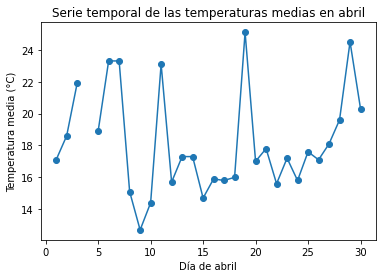

In [110]:
import matplotlib.pyplot as plt
temp = [float(t.replace(',', '.')) if t else float('nan') for t in temp]

# crear un rango de fechas para el eje x
fechas = range(1, len(temp) + 1)

# crear el gráfico de línea
plt.plot(fechas, temp, '-o')

# configurar los ejes y las etiquetas
plt.xlabel('Día de abril')
plt.ylabel('Temperatura media (°C)')
plt.title('Serie temporal de las temperaturas medias en abril')

# mostrar el gráfico
plt.show()

## Parte 3: datos de la Wikipedia
En esta parte vamos a obtener las URL de las entradas en la wikipedia para todas las provincias de España y vamos a obtener de ellas sus datos básicos en forma de tabla.\
El listado de las provincias de España se puede descargar de la página de la wikipedia siguiente:\
https://es.wikipedia.org/wiki/Provincia_(España)

In [111]:
r = requests.get("https://es.wikipedia.org/wiki/Provincia_(España)")
soup = BeautifulSoup(r.text, "html.parser")

In [112]:
tabla = soup.find("table", class_="wikitable")

In [113]:
#todas las filas de la tabla (<tr>)
provincias = tabla.find_all("tr")

In [118]:
#los datos están en la primera celda <td> de cada fila a partir de la 1 (la fila 0 son los encabezados)
print(provincias[1].td.prettify())

<td>
 <b>
  <a class="image" href="/wiki/Archivo:Flag_of_%C3%81lava.svg">
   <img alt="Flag of Álava.svg" class="thumbborder" data-file-height="500" data-file-width="750" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Flag_of_%C3%81lava.svg/20px-Flag_of_%C3%81lava.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Flag_of_%C3%81lava.svg/30px-Flag_of_%C3%81lava.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Flag_of_%C3%81lava.svg/40px-Flag_of_%C3%81lava.svg.png 2x" width="20"/>
  </a>
  <a href="/wiki/%C3%81lava" title="Álava">
   Álava
  </a>
 </b>
</td>



In [119]:
# extraemos el enlace
provincias[1].td.find("a")

<a class="image" href="/wiki/Archivo:Flag_of_%C3%81lava.svg"><img alt="Flag of Álava.svg" class="thumbborder" data-file-height="500" data-file-width="750" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Flag_of_%C3%81lava.svg/20px-Flag_of_%C3%81lava.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Flag_of_%C3%81lava.svg/30px-Flag_of_%C3%81lava.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Flag_of_%C3%81lava.svg/40px-Flag_of_%C3%81lava.svg.png 2x" width="20"/></a>

In [126]:
enlaces = []
for p in provincias:
    if p.td:
        refs = p.td.find_all('a')
        for r in refs:
          if r.has_attr('title'):
            enlaces.append(r)

In [127]:
enlaces

[<a href="/wiki/%C3%81lava" title="Álava">Álava</a>,
 <a href="/wiki/Provincia_de_Albacete" title="Provincia de Albacete"><b>Albacete</b></a>,
 <a href="/wiki/Provincia_de_Alicante" title="Provincia de Alicante"><b>Alicante</b></a>,
 <a href="/wiki/Provincia_de_Almer%C3%ADa" title="Provincia de Almería"><b>Almería</b></a>,
 <a href="/wiki/Asturias" title="Asturias">Asturias</a>,
 <a href="/wiki/Provincia_de_%C3%81vila" title="Provincia de Ávila"><b>Ávila</b></a>,
 <a href="/wiki/Provincia_de_Badajoz" title="Provincia de Badajoz"><b>Badajoz</b></a>,
 <a href="/wiki/Provincia_de_Barcelona" title="Provincia de Barcelona"><b>Barcelona</b></a>,
 <a href="/wiki/Provincia_de_Burgos" title="Provincia de Burgos"><b>Burgos</b></a>,
 <a href="/wiki/Provincia_de_C%C3%A1ceres" title="Provincia de Cáceres"><b>Cáceres</b></a>,
 <a href="/wiki/Provincia_de_C%C3%A1diz" title="Provincia de Cádiz"><b>Cádiz</b></a>,
 <a href="/wiki/Cantabria" title="Cantabria">Cantabria</a>,
 <a href="/wiki/Provincia_de_C

In [128]:
enlaces_df = pd.DataFrame({'provincia': [e.attrs['title'] for e in enlaces],
                           'enlace': [e.attrs['href'] for e in enlaces]})

In [129]:
enlaces_df

,provincia,enlace
0,Álava,/wiki/%C3%81lava
1,Provincia de Albacete,/wiki/Provincia_de_Albacete
2,Provincia de Alicante,/wiki/Provincia_de_Alicante
3,Provincia de Almería,/wiki/Provincia_de_Almer%C3%ADa
4,Asturias,/wiki/Asturias
5,Provincia de Ávila,/wiki/Provincia_de_%C3%81vila
6,Provincia de Badajoz,/wiki/Provincia_de_Badajoz
7,Provincia de Barcelona,/wiki/Provincia_de_Barcelona
8,Provincia de Burgos,/wiki/Provincia_de_Burgos
9,Provincia de Cáceres,/wiki/Provincia_de_C%C3%A1ceres


Por ejemplo, creamos el objeto `soup` para la primera provincia:

In [130]:
r = requests.get("https://es.wikipedia.org"+enlaces_df['enlace'][0])
soup = BeautifulSoup(r.text, "html.parser")

Vamos a extraer en un data frame la información geográfica de la tabla de la barra lateral derecha (atributo de clase `infobox`):

In [131]:
tabla = soup.find("table", class_="infobox")

Si inspeccionas su estructura HTML verás una serie de tags `tr` de las que cuelgan pares de tags `th` y `td` asociadas. Capturaremos sus textos en dos listas: `dato` y `valor`, respectivamante.

In [132]:
dato, valor = [],[]
for t in tabla.find_all("tr"):
    if t.th:
        if t.td:
            dato.append(t.th.text)
            #valor.append(t.td.text) # aparecen caracteres especiales!
            valor.append(' '.join([text for text in t.td.stripped_strings]))

In [133]:
datos = pd.DataFrame({'Dato': dato, 'Valor': valor})
datos

,Dato,Valor
0,Coordenadas,"42°50′00″N 2°45′00″O ﻿ / ﻿ 42.833333333333, -2.75"
1,Capital,Vitoria
2,Idioma oficial,Español y euskera
3,Entidad,Provincia de España
4,• País,España
5,• Comunidad,País Vasco
6,CongresoSenadoParlamento VascoJuntas Generales...,4 diputados 4 senadores 25 parlamentarios auto...
7,Subdivisiones,7 comarcas 51 municipios
8,Fundación,División territorial de 1833
9,Superficie,Puesto 48.º


### Ejercicio 3
Crea una tabla (dataframe) con la capital, la superficie y la población de cada provincia de España.\
Para encontrar en la tabla estos datos podemos hacer:

In [134]:
tabla.find(string='Capital').next.text

'\nVitoria'

In [135]:
tabla.find(string='Superficie').parent.parent.parent.next_sibling.text

'\xa0• Total\n3037 km²\xa0(0,60\xa0%)'

In [136]:
tabla.find(string='Población').parent.parent.parent.next_sibling.text

'\xa0• Total\n334\xa0412\xa0hab.\xa0(0,70\xa0%)'

Tendrás que usar expresiones regulares para extraer de estos strings el texto buscado. Si la información no está disponible para alguna provincia, rellena la celda con un string vacío.

In [137]:
#solución

#solución
import re
capitales = []
superficies = []
poblaciones = []

for i in range(len(enlaces)):
  r = requests.get("https://es.wikipedia.org"+enlaces_df['enlace'][i])
  soup = BeautifulSoup(r.text, "html.parser")
  tabla = soup.find("table", class_="infobox")
  dato, valor = [],[]
  for t in tabla.find_all("tr"):
      if t.th:
          if t.td:
              dato.append(t.th.text)
              #valor.append(t.td.text) # aparecen caracteres especiales!
              valor.append(' '.join([text for text in t.td.stripped_strings]))
  datos = pd.DataFrame({'Dato': dato, 'Valor': valor})
  
  capital = tabla.find(string='Capital').next.text
  capital = re.sub(r'\n[ \xa0]*', '', capital)
  capital = re.search(r'^([ A-Za-zÁÉÍÓÚáéíóúüÜñÑ ]+)', capital)
  
  if capital == None:
    capital = ''
  else:
    capital = capital.group()

  capitales.append(capital)

  superficie = tabla.find(string='Superficie').parent.parent.parent.next_sibling.text
  superficie = re.search(r'\d+[.\xa0\d]*', superficie)

  if superficie == None:
    superficie = ''
  else:
    superficie = superficie.group()
    superficie = superficie.replace('\xa0', '')
    superficie = superficie.replace('[^0-9]', '')
    print(superficie)
  superficies.append(superficie)

  poblacion = tabla.find(string='Población').parent.parent.parent.next_sibling.text
  poblacion = poblacion.replace('\xa0', '')
  poblacion = re.search(r'Total\n(\d+)\s*hab', poblacion)

  if poblacion == None:
    poblacion = ''
  else:
    poblacion = poblacion.group()

  poblaciones.append(poblacion)

print(capitales)
print(superficies)
print(poblaciones)

3037
14926
5816
8774
10603
8050
21766
7726
014292.
19868
7435
5321
6611.93
19813
13771
7950
17141
5910
12.531
12167
1997
10128
15
5040
13496
15581
12172
9856
8021
7308
11
10391
7273
8.052
4066
4495
5045
12349
6920.65
14036
10306
6303
3381
14
15369
10841
8111
2217
10561
17274
['Vitoria', 'Albacete', 'Alicante', 'Almería', 'Oviedo', 'Ávila', 'Badajoz', 'Barcelona', 'Burgos', 'Cáceres', 'Cádiz', 'Santander', 'Castellón de la Plana', 'Ciudad Real', 'Córdoba', 'La Coruña', 'Cuenca', 'Gerona', 'Granada', 'Guadalajara', 'San Sebastián', 'Huelva', 'Huesca', '', 'Jaén', 'León', 'Lérida', 'Lugo', 'Madrid ', 'Málaga', 'Murcia', 'Pamplona', 'Orense', 'Palencia', 'Las Palmas de Gran Canaria', 'Pontevedra', 'Logroño', 'Salamanca', 'Segovia', 'Sevilla', 'Soria', 'Tarragona', 'Santa Cruz de Tenerife', 'Teruel', 'Toledo', 'Valencia', 'Valladolid', 'Bilbao', 'Zamora', 'Zaragoza']
['3037', '14926', '5816', '8774', '10603', '8050', '21766', '7726', '014292.', '19868', '7435', '5321', '6611.93', '19813', '